# Картинки

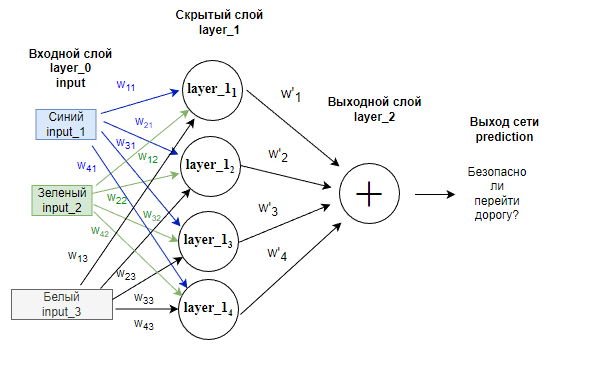

Введем обозначения:

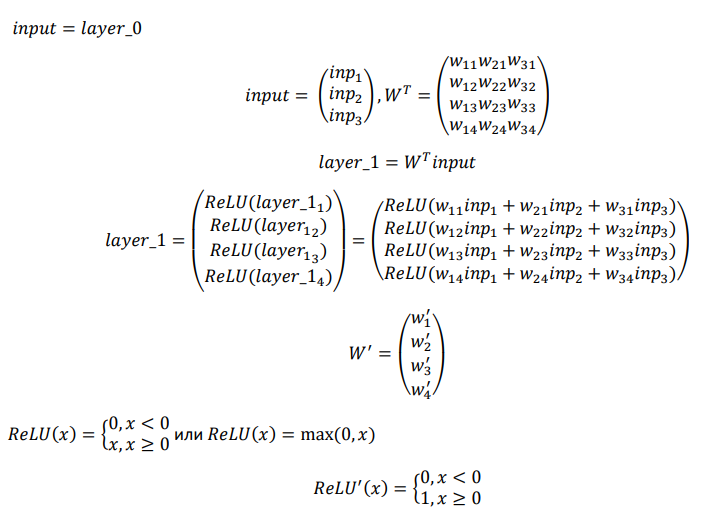

Обратный проход.
1. Коррекция весов W'. Та же процедура, что вы реализовывали ранее:



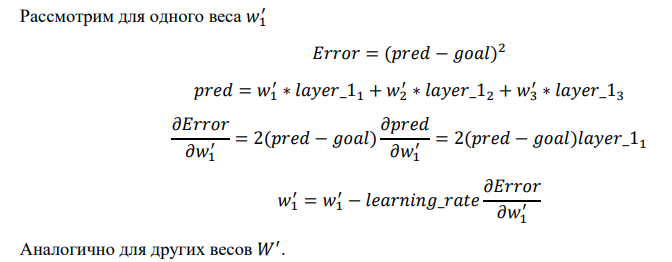

2.	Коррекция весов W:

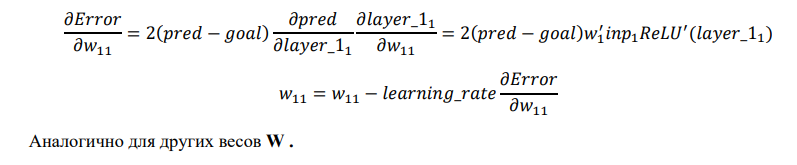

# 1. Добавьте нелинейность на скрытом слое и реализуйте обучение сети на полном наборе данных.

## 1. Библиотеки


In [77]:
import numpy as np
import matplotlib.pyplot as plt

## 2. Фукнция ReLU


In [78]:
def ReLU(x):
  return np.maximum(0, x)

## 3. Реализация

In [ ]:
np.random.seed(1)

lights = np.array( [[ 1, 0, 1 ],
                    [ 0, 1, 1 ],
                    [ 0, 0, 1 ],
                    [ 1, 1, 1 ] ] )

walk_stop = np.array([[ 1, 1, 0, 0]]).T

learning_rate = 0.1
hidden_size = 4

weights_input_layer = 2*np.random.random((3,hidden_size)) - 1 #веса между входным и скрытым слоями
weights_hidden_layer = 2*np.random.random((hidden_size,1)) - 1 #веса между скрытым и выходным слоями 
array_of_error = []

for i in range(20):
  #forward pass
  input = lights
  hidden_layer = np.dot(input, weights_input_layer)
  hidden_layer = ReLU(hidden_layer)

  prediction = np.dot(hidden_layer,weights_hidden_layer)
  goal_prediction = walk_stop
  error = (prediction-goal_prediction)**2  
  error = error.mean()
  array_of_error.append(error)
  
  print("\niteration = " + str(i))
  print("Error:" + str(error.T) + "\n"+ "Prediction:" + str(prediction.T)) 

  layer_2_delta=2*(prediction-goal_prediction)
  weight_corrections_outer_layer = hidden_layer.T.dot(layer_2_delta) # величина коррекции для весов между скрытым и выходом

  layer_1_delta=layer_2_delta*np.dot(ReLU(hidden_layer), weights_hidden_layer)
  weight_corrections_hidden_layer = input.T.dot(layer_1_delta) # величина коррекции для весов между входом и скрытым
  
  weights_input_layer -= learning_rate * weight_corrections_hidden_layer
  weights_hidden_layer -= learning_rate * weight_corrections_outer_layer


## 4. График

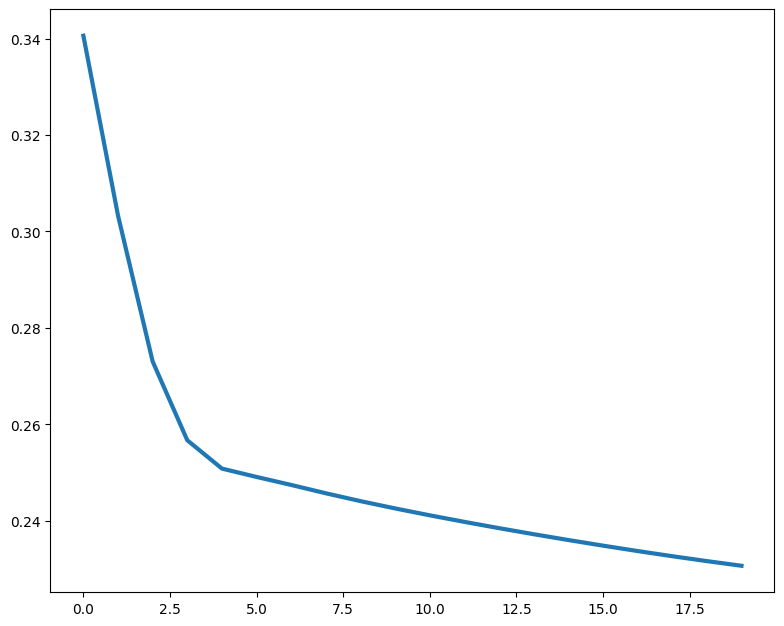

In [80]:
fig = plt.figure(figsize=(15, 12), constrained_layout=True)
ax1 = fig.add_subplot(221)
ax1.plot(np.arange(len(array_of_error)), array_of_error, linewidth = 3)

# 2. Выберите другую функцию активации и запустите обучение. 

In [81]:
def up_ReLU(x, a):
  return np.where(x >= 0, x, x * a)  

def dw_PReLU(x):
    return x * (x <= 0)

In [83]:
np.random.seed(1)

lights = np.array( [[ 1, 0, 1 ],
                    [ 0, 1, 1 ],
                    [ 0, 0, 1 ],
                    [ 1, 1, 1 ] ] )

walk_stop = np.array([[ 1, 1, 0, 0]]).T

learning_rate = 0.2
hidden_size = 4
activation_parameter = 0.03

weights_input_layer = 2*np.random.random((3,hidden_size)) - 1 #веса между входным и скрытым слоями
weights_hidden_layer = 2*np.random.random((hidden_size,1)) - 1 #веса между скрытым и выходным слоями 


for i in range(20):
  #forward pass
  input = lights
  hidden_layer = np.dot(input, weights_input_layer)
  hidden_layer = up_ReLU(hidden_layer, activation_parameter)

  prediction = np.dot(hidden_layer,weights_hidden_layer)
  goal_prediction = walk_stop
  error = (prediction-goal_prediction)**2
  error = error.mean()
  print("\niteration="+str(i)+" Error:" + str(error) + " Prediction:" + str(prediction.T)) 


  #backward pass
  prediction_delta=2*(prediction-goal_prediction)
  weight_corrections_outer_layer = hidden_layer.T.dot(prediction_delta) #величина коррекции для весов между скрытым и выходом

  hidden_layer_delta=prediction_delta*np.dot(dw_PReLU(hidden_layer), weights_hidden_layer)
  weight_corrections_hidden_layer = input.T.dot(hidden_layer_delta) #величина коррекции для весов между входом и скрытым
  
  weights_input_layer -= learning_rate * weight_corrections_hidden_layer
  weights_hidden_layer -= learning_rate * weight_corrections_outer_layer


iteration=0 Error:0.3201531125312673 Prediction:[[0.43122574 0.04281744 0.19324874 0.05970562]]

iteration=1 Error:0.30072774367033794 Prediction:[[0.50433574 0.04787943 0.21709259 0.05970879]]

iteration=2 Error:0.2844876121706186 Prediction:[[0.57773783 0.05250008 0.24147161 0.05983704]]

iteration=3 Error:0.27270279576532036 Prediction:[[0.64290427 0.05717113 0.26600828 0.06005951]]

iteration=4 Error:0.26455993170126435 Prediction:[[0.69857785 0.0619376  0.28944669 0.06036521]]

iteration=5 Error:0.2591055589990255 Prediction:[[0.74495857 0.06673312 0.31096599 0.06073864]]

iteration=6 Error:0.2555298557185756 Prediction:[[0.78272816 0.07149179 0.3302181  0.06116279]]

iteration=7 Error:0.253202121616099 Prediction:[[0.81286302 0.07617714 0.34719198 0.06162216]]

iteration=8 Error:0.2516654864458465 Prediction:[[0.83646134 0.0807852  0.36208329 0.06210383]]

iteration=9 Error:0.2506080565451359 Prediction:[[0.85461381 0.08533688 0.37519063 0.06259755]]

iteration=10 Error:0.249826

# Вопросы

## Вопрос: Какие бывают функции активации? В чем преимущество ReLU перед ними? 

ReLU активирует только веса с положительными значениями, а другие (например сигмоида, гиперполический тангенс) активирует почти все, что увеличивает вес сети и время обучения. То есть применение данной функции в какой-то степени оптимизиерует обучение
Также функция ReLU и ее производная монотонны, они вычисляются гораздо проще других функций активации, что оказывает положительное влияет на производительность обучения модели.

## Вопрос: Что такое эпоха обучения? Чем она отличается от 1 итерации?  

Ответ: Эпоха - проход через сеть всей обучающей выборки 1 раз, а итерация — число батчей, необходимых для завершения одной эпохи
То есть итерация является частью эпохи.